## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [40]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [41]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp_df = pd.read_csv(
    Path('./Resources/bitstamp.csv'),
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [42]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
display(bitstamp_df.head())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,$430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,$430.89,0.143257,61.728095,430.890000
2015-12-31 19:03:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2015-12-31 19:04:00,430.19,431.06,430.19,$431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,$430.54,5.558156,2397.461993,431.341280


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [43]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase_df = pd.read_csv(
    Path('./Resources/coinbase.csv'),
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)


In [45]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
display(coinbase_df.head())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,$430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,$430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,$430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,$430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,$430.96,12.114161,5216.297064,430.595001


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [46]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp_df = bitstamp_df.dropna()

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [47]:
# Use the str.replace function to remove the dollar sign, $
bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].str.replace("$", "")

# Call the head function to review the first 5 rows of the DataFrame
bitstamp_df.head()
# bitstamp_df.dtypes

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,430.89,0.143257,61.728095,430.890000
2015-12-31 19:04:00,430.19,431.06,430.19,431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,430.54,5.558156,2397.461993,431.341280
2015-12-31 19:06:00,432.53,432.53,431.48,432.52,4.117318,1776.650476,431.506725


### Step 3: Convert the data type of the Close column to a `float`.

In [48]:
# Convert the Close data type to a float
bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].astype("float")
bitstamp_df.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [49]:
# Review the data for duplicate values, and drop them if necessary
bitstamp_df = bitstamp_df.drop_duplicates()
bitstamp_df.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [50]:
# Repeat Steps 1–4 for the coinbase DataFrame
# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
coinbase_df = coinbase_df.dropna()

In [51]:
# Use the str.replace function to remove the dollar sign, $
coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].str.replace("$", "")

# Call the head function to review the first 5 rows of the DataFrame
coinbase_df.head()
# coinbase_df.dtypes

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,430.96,12.114161,5216.297064,430.595001


In [52]:
# Convert the Close data type to a float
coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].astype("float")
coinbase_df.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [53]:
# Review the data for duplicate values, and drop them if necessary
coinbase_df = coinbase_df.drop_duplicates()
coinbase_df.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following steps:

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [54]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp_df.loc[:, "Close"]

# Review the first five rows of the DataFrame 
bitstamp_sliced.head()

Timestamp
2015-12-31 19:01:00    430.89
2015-12-31 19:02:00    430.89
2015-12-31 19:04:00    431.06
2015-12-31 19:05:00    430.54
2015-12-31 19:06:00    432.52
Name: Close, dtype: float64

In [55]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase_df.loc[:, "Close"]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2015-12-31 19:01:00    430.40
2015-12-31 19:02:00    430.40
2015-12-31 19:03:00    430.36
2015-12-31 19:04:00    430.39
2015-12-31 19:05:00    430.96
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [56]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    1.347772e+06
mean     4.503924e+03
std      3.956149e+03
min      1.500000e+00
25%      7.888900e+02
50%      3.788990e+03
75%      6.929443e+03
max      1.966575e+04
Name: Close, dtype: float64

In [57]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    1.549523e+06
mean     4.091926e+03
std      3.913501e+03
min      6.000000e-02
25%      6.754000e+02
50%      2.710730e+03
75%      6.593500e+03
max      1.989199e+04
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Closing Prices'}, xlabel='Timestamp'>

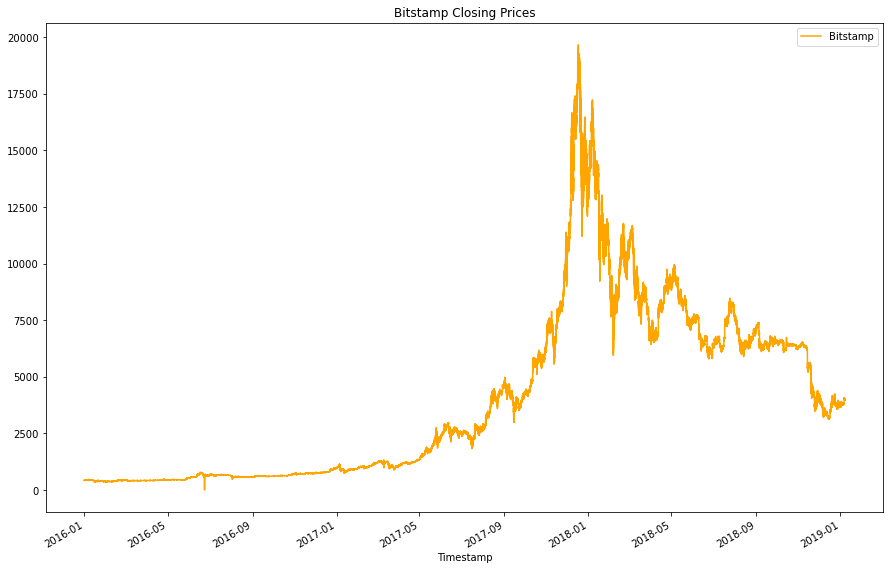

In [58]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(legend=True, figsize=(15, 10), title="Bitstamp Closing Prices", color="orange", label="Bitstamp")

<AxesSubplot:title={'center':'Coinbase Closing Prices'}, xlabel='Timestamp'>

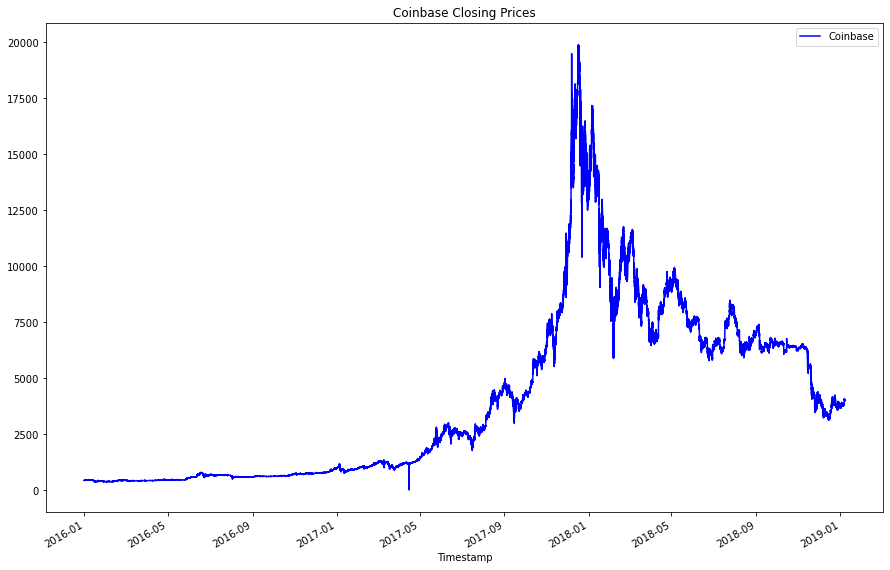

In [59]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(legend=True, figsize=(15, 10), title="Coinbase Closing Prices", color="blue", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase Closing Prices'}, xlabel='Timestamp'>

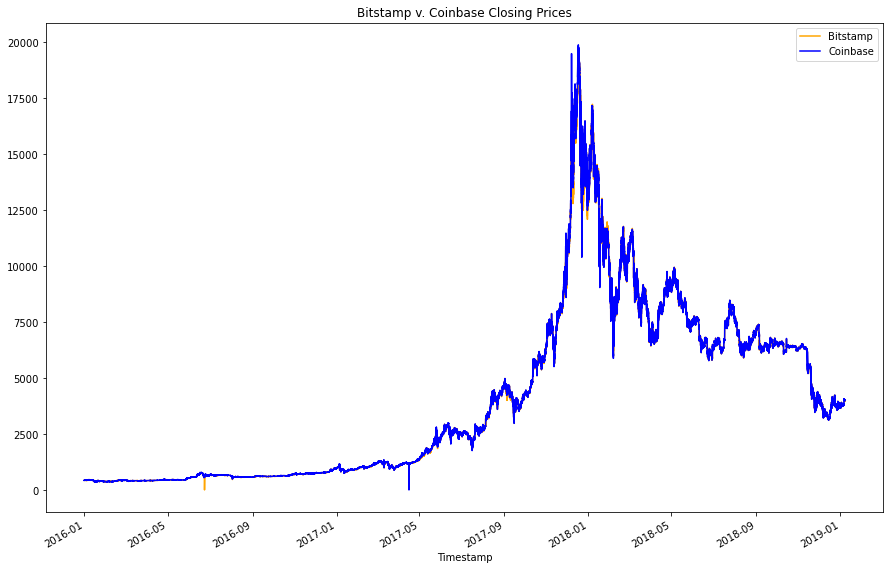

In [60]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase Closing Prices", color="orange", label="Bitstamp")
coinbase_sliced.plot(legend=True, figsize=(15, 10), color="blue", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase - Early Stage Month (July 2016)'}, xlabel='Timestamp'>

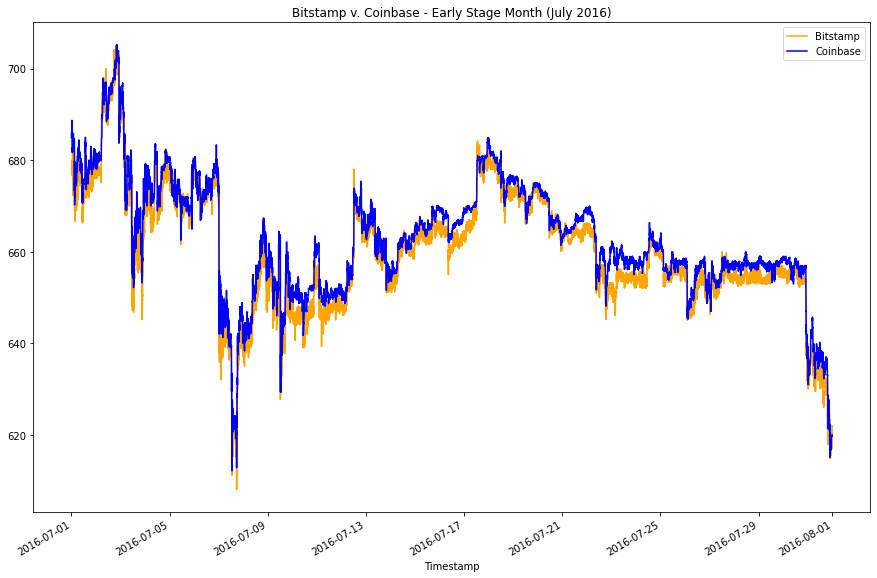

In [61]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc['2016-07-01' : '2016-07-31'].plot(
    legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase - Early Stage Month (July 2016)", color="orange", label="Bitstamp")
coinbase_sliced.loc['2016-07-01' : '2016-07-31'].plot(
    legend=True, figsize=(15, 10), color="blue", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase - Late Stage Month (Nov. 2018)'}, xlabel='Timestamp'>

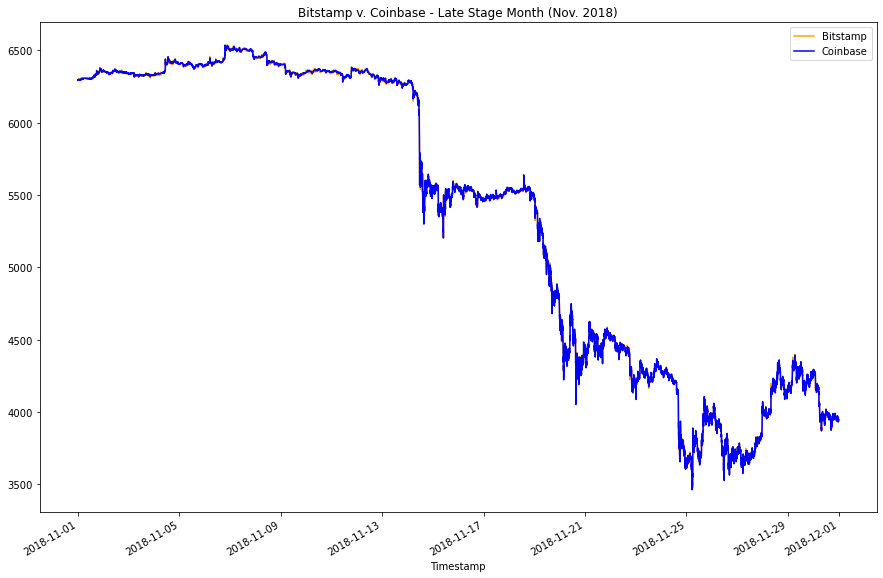

In [62]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc['2018-11-01' : '2018-11-30'].plot(
    legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase - Late Stage Month (Nov. 2018)", color="orange", label="Bitstamp")
coinbase_sliced.loc['2018-11-01' : '2018-11-30'].plot(
    legend=True, figsize=(15, 10), color="blue", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** # YOUR ANSWER HERE    The spread has narrowed from (describes) to etc.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the last year of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp v. Coinbase - Early Stage Day (July 22, 2016)'}, xlabel='Timestamp'>

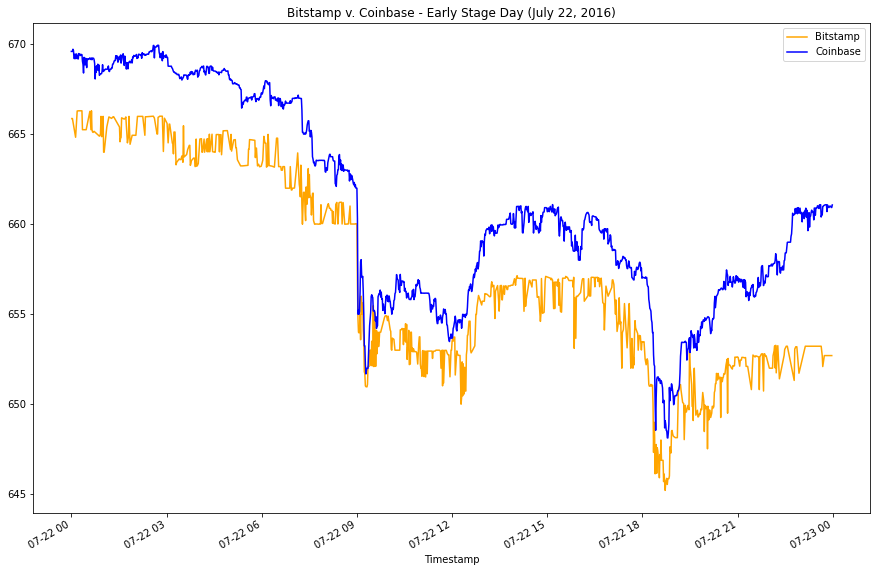

In [63]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2016-07-22' : '2016-07-22'].plot(
    legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase - Early Stage Day (July 22, 2016)", color="orange", label="Bitstamp")
coinbase_sliced.loc['2016-07-22' : '2016-07-22'].plot(
    legend=True, figsize=(15, 10), color="blue", label="Coinbase")

In [64]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced.loc['2016-07-22'] - bitstamp_sliced.loc['2016-07-22']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    806.000000
mean       3.572146
std        1.332831
min       -0.290000
25%        2.825000
50%        3.550000
75%        4.397500
max        9.210000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Early Stage'}>

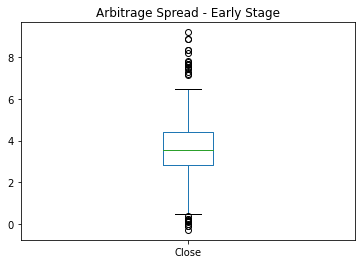

In [65]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# Be sure to include at least a title with your plot
arbitrage_spread_early.plot(title='Arbitrage Spread - Early Stage', kind='box')

<AxesSubplot:title={'center':'Bitstamp v. Coinbase - Mid Stage Day (May 10, 2017)'}, xlabel='Timestamp'>

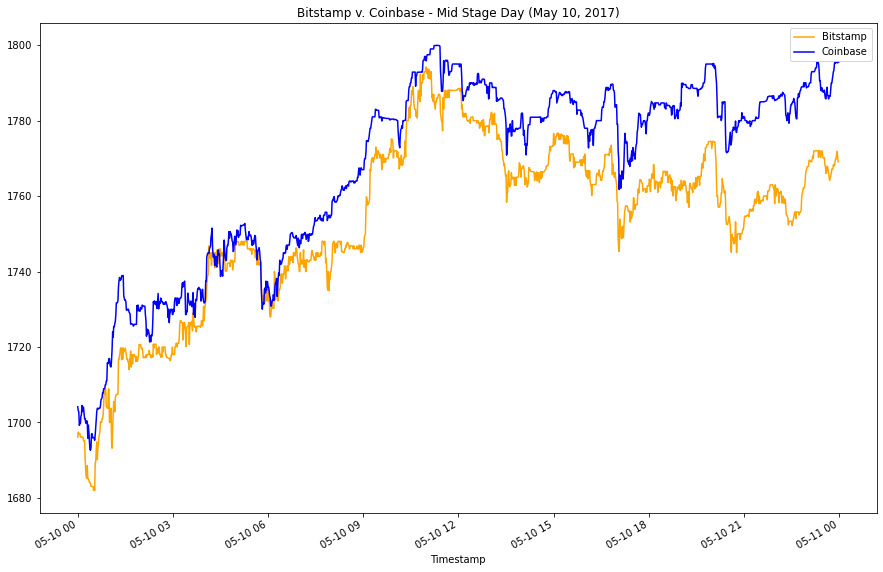

In [66]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2017-05-10' : '2017-05-10'].plot(
    legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase - Mid Stage Day (May 10, 2017)", color="orange", label="Bitstamp")
coinbase_sliced.loc['2017-05-10' : '2017-05-10'].plot(
    legend=True, figsize=(15, 10), color="blue", label="Coinbase")

In [67]:
# Using the date form the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced.loc['2017-05-10'] - bitstamp_sliced.loc['2017-05-10']

# Generate summary statistics for the middle DataFrame
arbitrage_spread_middle.describe()

count    1357.000000
mean       13.231459
std         7.611554
min        -7.270000
25%         7.200000
50%        12.530000
75%        18.590000
max        32.540000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Mid Stage'}>

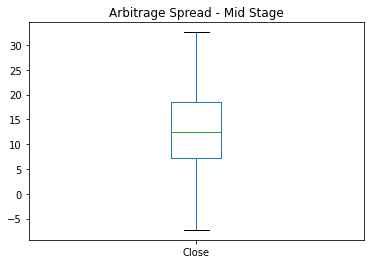

In [68]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# Be sure to include at least a title with your plot
arbitrage_spread_middle.plot(title='Arbitrage Spread - Mid Stage', kind='box')

<AxesSubplot:title={'center':'Bitstamp v. Coinbase - Late Stage Day (Nov. 17, 2018)'}, xlabel='Timestamp'>

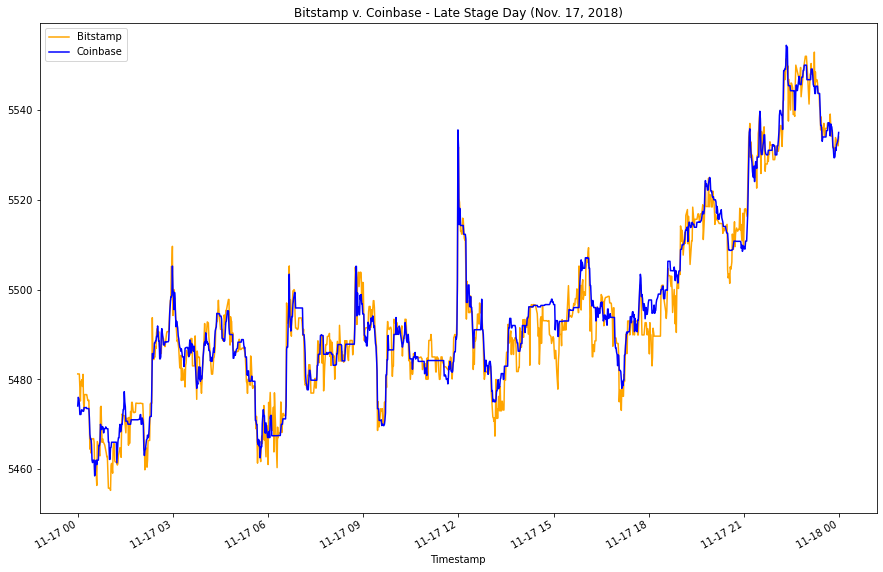

In [69]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-11-17' : '2018-11-17'].plot(
    legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase - Late Stage Day (Nov. 17, 2018)", color="orange", label="Bitstamp")
coinbase_sliced.loc['2018-11-17' : '2018-11-17'].plot(
    legend=True, figsize=(15, 10), color="blue", label="Coinbase")

In [70]:
# Using th date from late in the dataset that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced.loc['2018-11-17'] - bitstamp_sliced.loc['2018-11-17']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1157.000000
mean        0.682956
std         3.688340
min       -10.250000
25%        -1.730000
50%         0.330000
75%         3.040000
max        13.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Late Stage'}>

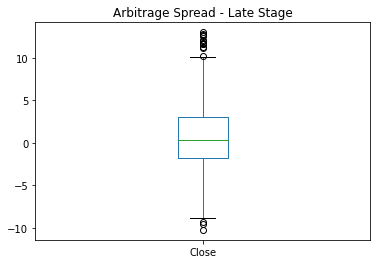

In [71]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# Be sure to include at least a title with your plot
arbitrage_spread_late.plot(title='Arbitrage Spread - Late Stage', kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

In [72]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_sliced.loc['2016-07-22'] - bitstamp_sliced.loc['2016-07-22']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE

arbitrage_spread_early.describe()

count    806.000000
mean       3.572146
std        1.332831
min       -0.290000
25%        2.825000
50%        3.550000
75%        4.397500
max        9.210000
Name: Close, dtype: float64

In [73]:
# For the from the middle of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = coinbase_sliced.loc['2017-05-10'] - bitstamp_sliced.loc['2017-05-10']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
# Generate summary statistics for the middle DataFrame
arbitrage_spread_middle.describe()

count    1357.000000
mean       13.231459
std         7.611554
min        -7.270000
25%         7.200000
50%        12.530000
75%        18.590000
max        32.540000
Name: Close, dtype: float64

In [74]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = coinbase_sliced.loc['2018-11-17'] - bitstamp_sliced.loc['2018-11-17']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1157.000000
mean        0.682956
std         3.688340
min       -10.250000
25%        -1.730000
50%         0.330000
75%         3.040000
max        13.010000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [75]:
# For the date early in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0) by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0] / bitstamp_sliced.loc['2016-07-22']

# Review the spread return DataFrame
spread_return_early.head()

Timestamp
2016-07-22 00:01:00    0.005602
2016-07-22 00:02:00    0.005602
2016-07-22 00:08:00    0.006573
2016-07-22 00:11:00    0.004367
2016-07-22 00:14:00    0.004773
Name: Close, dtype: float64

In [76]:
# For the date in the middle of the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0] / bitstamp_sliced.loc['2017-05-10']

# Review the spread return DataFrame
spread_return_middle.head()

Timestamp
2017-05-10 00:00:00    0.004746
2017-05-10 00:01:00    0.003346
2017-05-10 00:02:00    0.003376
2017-05-10 00:03:00    0.001290
2017-05-10 00:04:00    0.001615
Name: Close, dtype: float64

In [77]:
# For the date late in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0] / bitstamp_sliced.loc['2018-11-17']

# Review the spread return DataFrame
spread_return_late.head()

Timestamp
2018-11-17 00:00:00   NaN
2018-11-17 00:01:00   NaN
2018-11-17 00:02:00   NaN
2018-11-17 00:03:00   NaN
2018-11-17 00:05:00   NaN
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [78]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]
# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2016-07-22 20:03:00    0.011305
2016-07-22 20:28:00    0.011028
2016-07-22 20:41:00    0.011809
2016-07-22 22:47:00    0.014141
2016-07-22 22:48:00    0.011469
Name: Close, dtype: float64

In [79]:
# For the date in the middle of the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]
# Review the first five profitable trades
profitable_trades_middle.head()

Timestamp
2017-05-10 01:04:00    0.013005
2017-05-10 01:05:00    0.015639
2017-05-10 01:06:00    0.015515
2017-05-10 01:07:00    0.011901
2017-05-10 01:08:00    0.011662
Name: Close, dtype: float64

In [80]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .01]
# Review the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [81]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    18.000000
mean      0.012131
std       0.000936
min       0.010992
25%       0.011484
50%       0.011799
75%       0.012747
max       0.014141
Name: Close, dtype: float64

In [82]:
# For the date in the middle of the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    383.000000
mean       0.013086
std        0.002077
min        0.010022
25%        0.011536
50%        0.012825
75%        0.014493
max        0.018529
Name: Close, dtype: float64

In [83]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [84]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_sliced.loc['2016-07-22']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2016-07-22 20:03:00    7.32
2016-07-22 20:28:00    7.16
2016-07-22 20:41:00    7.67
2016-07-22 22:47:00    9.21
2016-07-22 22:48:00    7.49
2016-07-22 22:50:00    7.43
2016-07-22 22:52:00    7.70
2016-07-22 22:56:00    8.89
2016-07-22 23:08:00    7.53
2016-07-22 23:32:00    7.80
2016-07-22 23:33:00    7.69
2016-07-22 23:34:00    7.65
2016-07-22 23:38:00    7.18
2016-07-22 23:40:00    7.82
2016-07-22 23:41:00    8.89
2016-07-22 23:44:00    8.35
2016-07-22 23:46:00    8.38
2016-07-22 23:58:00    8.23
Name: Close, dtype: float64

In [85]:
# For the date in the middle of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitstamp_sliced.loc['2017-05-10']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle

Timestamp
2017-05-10 01:04:00    22.04
2017-05-10 01:05:00    26.48
2017-05-10 01:06:00    26.34
2017-05-10 01:07:00    20.26
2017-05-10 01:08:00    19.89
                       ...  
2017-05-10 23:53:00    25.46
2017-05-10 23:54:00    25.61
2017-05-10 23:55:00    24.48
2017-05-10 23:56:00    23.53
2017-05-10 23:58:00    26.38
Name: Close, Length: 383, dtype: float64

In [86]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bitstamp_sliced.loc['2018-11-17']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [87]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    18.000000
mean      7.910556
std       0.611666
min       7.160000
25%       7.500000
50%       7.695000
75%       8.320000
max       9.210000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit per Trade - Early Stage (July 22, 2016)'}, xlabel='Timestamp'>

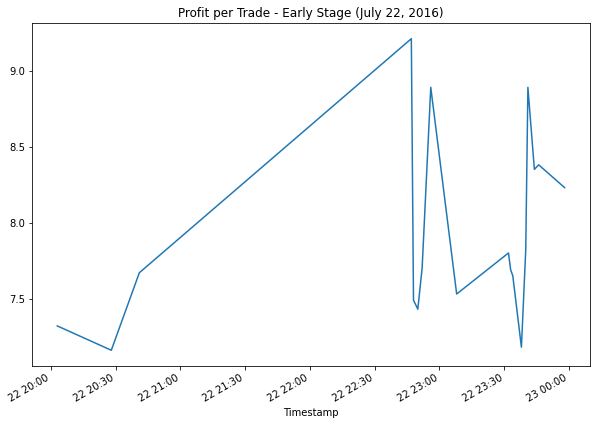

In [88]:
# Plot the results for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_early.plot(figsize=(10, 7), title='Profit per Trade - Early Stage (July 22, 2016)')

In [89]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

count    383.000000
mean      23.003969
std        3.627477
min       17.500000
25%       20.275000
50%       22.520000
75%       25.465000
max       32.540000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit per Trade - Mid Stage (May 10, 2017)'}, xlabel='Timestamp'>

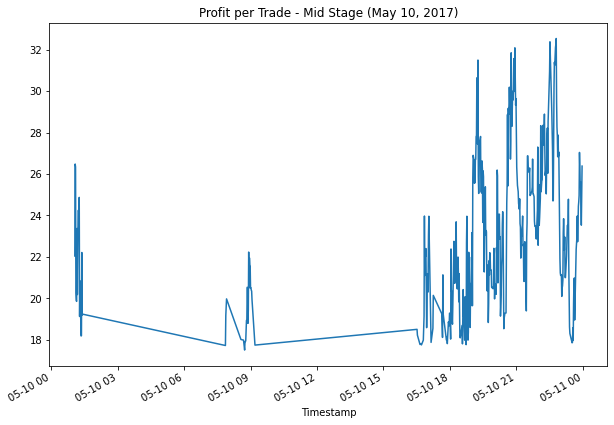

In [90]:
# Plot the results for the middle profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_middle.plot(figsize=(10, 7), title='Profit per Trade - Mid Stage (May 10, 2017)')

In [91]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe() 

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit per Trade - Late Stage (Nov. 17, 2018)'}, xlabel='Timestamp'>

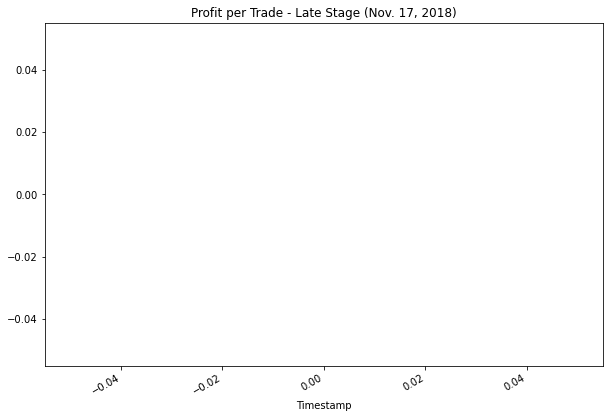

In [92]:
# Plot the results for the late profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_late.plot(figsize=(10, 7), title='Profit per Trade - Late Stage (Nov. 17, 2018)')

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [93]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum_early = profit_per_trade_early.sum()
profit_sum_early

142.3899999999993

In [94]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_sum_middle = profit_per_trade_middle.sum()
profit_sum_middle

8810.519999999997

In [95]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_sum_late = profit_per_trade_late.sum()
profit_sum_late

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [96]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Daily Profits - Early Stage (July 22, 2016)'}, xlabel='Timestamp'>

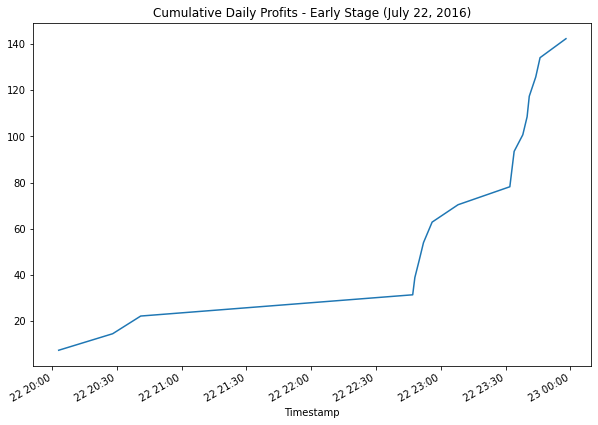

In [97]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_early.plot(figsize=(10, 7), title="Cumulative Daily Profits - Early Stage (July 22, 2016)")

In [98]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Cumulative Daily Profits - Mid Stage (May 10, 2017)'}, xlabel='Timestamp'>

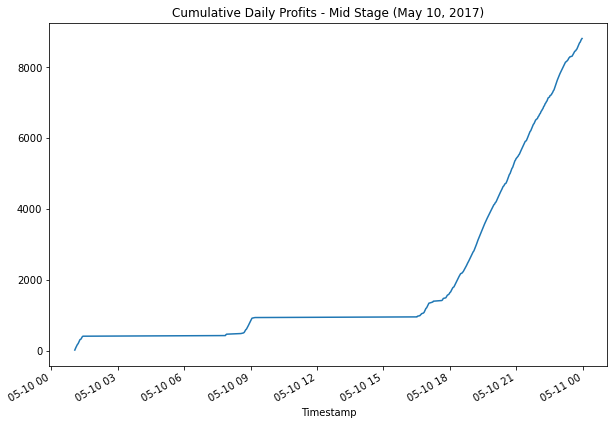

In [99]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
# YOUR CODE HERE
cumulative_profit_middle.plot(figsize=(10, 7), title="Cumulative Daily Profits - Mid Stage (May 10, 2017)")

In [100]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Daily Profits - Late Stage (Nov. 17, 2018)'}, xlabel='Timestamp'>

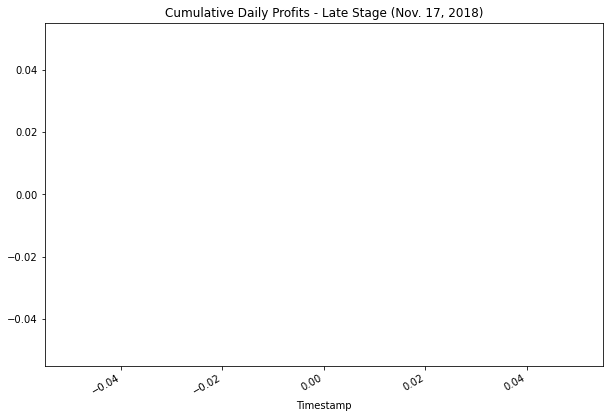

In [101]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_late.plot(figsize=(10, 7), title="Cumulative Daily Profits - Late Stage (Nov. 17, 2018)")